# Random Forest:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import numpy as np
from matplotlib import pyplot as plt
import pydot

# Referenced for random forest:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

match_data = pd.read_csv('match_data.csv')
match_data = match_data.drop(columns=['ID','Top', 'Jungle', 'Mid', 'Bot', 'Support', 'Enemy Top', 'Enemy Jungle', 'Enemy Mid', 'Enemy Bot', 'Enemy Support'])
scaler = StandardScaler()

match_data.head()

,Team Gold,Team Kills,Team Deaths,Dragons,Dragon Soul,Baron,Rift Herald,First tower,First Kill,Team Total CC,Victory
0,50485,22,41,0,False,0,0,False,False,114,False
1,59860,41,22,4,True,1,2,True,True,122,True
2,49125,22,38,0,False,1,2,True,True,110,False
3,52775,38,22,3,False,0,0,False,False,108,True
4,34785,20,4,1,False,0,2,True,True,32,True


### Cleaning the dataset:

In [2]:
labels = np.array(match_data['Victory'])

match_data = match_data.drop('Victory', axis = 1)

attribute_list = list(match_data.columns)

match_data = scaler.fit_transform(np.array(match_data).astype(int))
display(match_data)

array([[-0.00703038, -0.49023818,  0.82458823, ..., -0.98888788,
        -0.99424938,  0.06572686],
       [ 0.59263016,  0.82458823, -0.49023818, ...,  1.01123699,
         1.00578388,  0.21566117],
       [-0.09402113, -0.49023818,  0.61698406, ...,  1.01123699,
         1.00578388, -0.00924029],
       ...,
       [-3.07953108, -2.01266875, -2.01266875, ..., -0.98888788,
        -0.99424938, -2.07083701],
       [-1.84918756, -1.52825902, -0.55943957, ..., -0.98888788,
        -0.99424938, -0.90884613],
       [-1.31253135, -0.55943957, -1.52825902, ...,  1.01123699,
         1.00578388, -0.74017003]])

### Splitting the dataset:

In [3]:
# train, test = train_test_split(match_data, test_size=0.2)
# x_train, y_train = train.drop(columns=['Victory']), train['Victory']
# x_test, y_test = test.drop(columns=['Victory']), test['Victory']

x_train, x_test, y_train, y_test = train_test_split(match_data, labels, test_size = 0.20, random_state = 42)

### Training the model:

In [4]:
rf = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=42)

rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

### Make Predictions:

In [5]:
predictions = rf.predict(x_test)
y_train_pred = rf.predict(x_train)
y_pred_prob = rf.predict_proba(x_test)[:, 1]
print("Testing results:\n\n %s" % classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)

Testing results:

               precision    recall  f1-score   support

       False       0.93      0.93      0.93      1669
        True       0.93      0.93      0.93      1661

    accuracy                           0.93      3330
   macro avg       0.93      0.93      0.93      3330
weighted avg       0.93      0.93      0.93      3330

[[1559  110]
 [ 112 1549]]


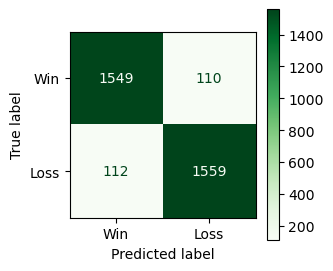

In [6]:
disp = ConfusionMatrixDisplay.from_predictions(
                  predictions,
                  y_test, 
                  labels=[1,0],
                  cmap=plt.cm.Greens,
                  display_labels=['Win','Loss'], 
                  values_format='',  
) 
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3) 

plt.show()

In [7]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

### Hyperparameter Tuning using grid search

In [33]:
from sklearn.model_selection import GridSearchCV
rf1 = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 350, 400, 500, 600],  # number of trees
    'max_depth': [None, 5, 10],  # maximum depth of each tree
    'max_features': ['sqrt']  # number of features to consider at each split
}

grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.score(x_test, y_test)


0.9297297297297298

In [70]:
print(best_params)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
